In [127]:
import numpy as np 
from matplotlib import pyplot as plt
import random
import os

os.chdir('/Users/microwave/AIO_2024/Module_4/Week1')

### Coding and multiple choice question 1


In [128]:
def get_column(data, index):
    data = np.array(data)
    result = data[:, index]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',names=True).tolist()
    N = len(data)
    
    tv_data = get_column(data,0)
    radio_data = get_column(data,1)
    news_data = get_column(data,2)
    sales_data = get_column(data,3)

    X = [tv_data,radio_data,news_data]
    Y = sales_data
    return X,Y

X,y = prepare_data('Advertising data.csv')
data_list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(data_list)


[624.1, 175.10000000000002, 300.5, 78.9]


In [129]:
def initialize_param1():
    w1 = random.gauss(mu = 0.0, sigma = 1.0)
    w2 = random.gauss(mu = 0.0, sigma = 1.0)
    w3 = random.gauss(mu = 0.0, sigma = 1.0)
    b = 0
    return w1,w2,w3,b

def initialize_param():
    w1, w2, w3, b = (0.016992259082509283 , 0.0070783670518262355, -0.002307860847821344 , 0)
    return w1, w2, w3, b

def compute_predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = w1*x1 + w2*x2 + w3*x3 + b
    return y_hat

def compute_loss_mse(y_hat, y):
    mse = ((y - y_hat)**2)
    return mse

def compute_gradient(x, y_hat, y):
    d_w1 = 2 * (y_hat - y) * x
    return d_w1

def compute_grad_bias(y_hat, y):
    db = 2 * (y_hat - y)
    return db

def update_params(w, lr, d_w):
    w = w - lr * d_w
    return w

def update_bias(b, lr, d_b):
    b = b - lr * d_b
    return b


In [130]:
def implement_linear_regression(X_data, y_data, EPOCHS = 50, lr = 1e-5):
    w1, w2, w3, b = initialize_param()
    losses = []

    N = len(y_data)
    for epoch in range(EPOCHS):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = compute_predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y_hat, y)

            d_w1 = compute_gradient(x1, y_hat, y)
            d_w2 = compute_gradient(x2, y_hat, y)
            d_w3 = compute_gradient(x3, y_hat, y)
            d_b = compute_grad_bias(y_hat, y)

            w1 = update_params(w1, lr, d_w1)  
            w2 = update_params(w2, lr, d_w2)  
            w3 = update_params(w3, lr, d_w3)  
            b = update_bias(b, lr, d_b)       

            losses.append(loss)

    return (w1, w2, w3, b, losses)


### Question 2

In [131]:
y_pred = compute_predict(1,1,1,0,0.5,0,0.5)
y_pred

1.0

### Question 3

In [132]:
loss = compute_loss_mse(1,0.5)
loss 

0.25

### Question 4,5

In [133]:
dw = compute_gradient(1,0.5,1)
db = compute_grad_bias(0.5,2)

dw, db

(-1.0, -3.0)

### Question 6,7

In [134]:
after_b = update_bias(0.5,1e-5,-1)
after_w = update_weight(1,1e-5,-0.5)
after_b, after_w

(0.50001, 1.000005)

### Question 8

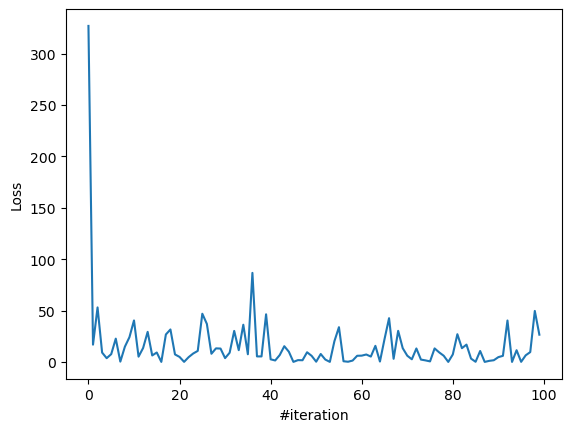

In [135]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [136]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
w1,w2,w3

(0.07405984066396477, 0.15917360263437663, 0.017561197559948935)

### Question 9 

In [137]:
tv, radio, newspaper = 19.2, 35.9, 51.3

X,y = prepare_data('Advertising data.csv')
(w1, w2, w3, b,losses) = implement_linear_regression(X, y, 50, 1e-5)
sales = compute_predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


### Question 10

In [138]:
def compute_loss_mae(y_hat, y):
    mae = abs(y - y_hat)
    return mae

loss = compute_loss_mae(y_hat = 1, y = 0.5)
loss

0.5

In [139]:
def implement_linear_regression_nsamples(X_data, y_data, EPOCHS = 50, lr = 1e-5, loss = 'mse'):
    losses = []
    w1, w2, w3, b = initialize_param()

    N = len(y_data)
    for epoch in range(EPOCHS):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = compute_predict(x1, x2, x3, w1, w2, w3, b)

            if loss == 'mse':
                current_loss = compute_loss_mse(y_hat, y)
            elif loss == 'mae':
                current_loss = compute_loss_mae(y_hat, y)
            
            loss_total += current_loss

            d_w1 = compute_gradient(x1, y_hat, y) / N
            d_w2 = compute_gradient(x2, y_hat, y) / N
            d_w3 = compute_gradient(x3, y_hat, y) / N
            d_b = compute_grad_bias(y_hat, y) / N 

            dw1_total += d_w1
            dw2_total += d_w2
            dw3_total += d_w3
            db_total += d_b

        w1 = update_params(w1, lr, dw1_total)  
        w2 = update_params(w2, lr, dw2_total)  
        w3 = update_params(w3, lr, dw3_total)  
        b = update_bias(b, lr, db_total)      
        losses.append(loss_total/N)

    return (w1, w2, w3, b, losses)

0.06710990754044266 0.15756173831487585 0.029619799386084403


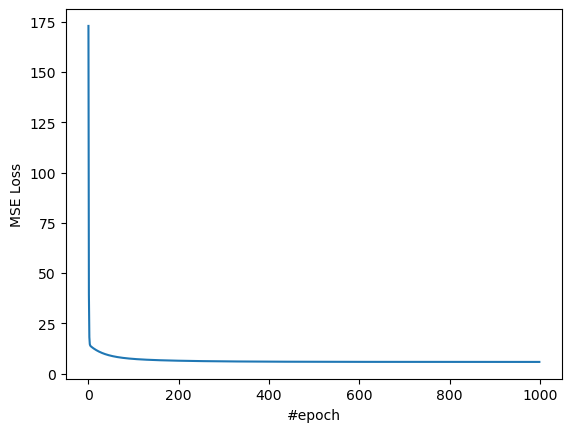

In [140]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, EPOCHS=1000, lr=1e-5, loss='mse')
print(w1,w2,w3)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

0.06710990754044266 0.15756173831487585 0.029619799386084403


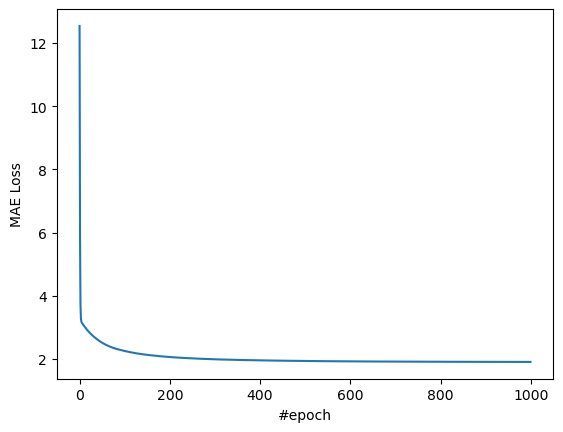

In [141]:
X, y = prepare_data('Advertising data.csv')
(w1, w2, w3, b,losses) = implement_linear_regression_nsamples(X, y, EPOCHS=1000, lr=1e-5,loss = 'mae')

print(w1,w2,w3)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MAE Loss')
plt.show()

In [142]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',names=True).tolist()

    tv_data = get_column(data,0)
    radio_data = get_column(data,1)
    news_data = get_column(data,2)
    sales_data = get_column(data,3)

    X = [[1,x1,x2,x3] for x1,x2,x3 in zip(tv_data,radio_data,news_data)]
    y = sales_data
    return X,y

X,y = prepare_data('Advertising data.csv')

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49


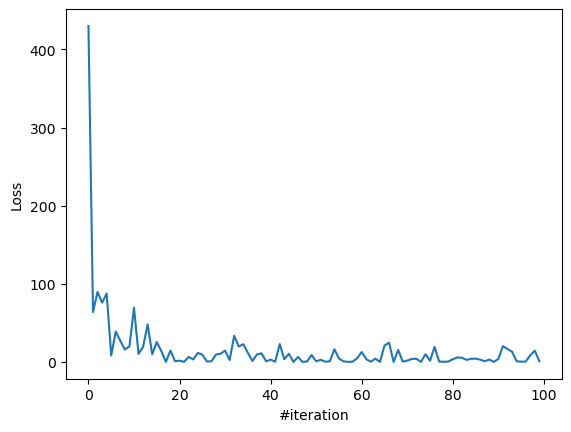

In [143]:
def initialize_param():
    bias = 0
    w1 = random.gauss(0, 0.01)
    w2 = random.gauss(0, 0.01)
    w3 = random.gauss(0, 0.01)
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

def predict(X_features, weights):
    predictions = X_features[0]*weights[1] + X_features[1]*weights[2] + X_features[2]*weights[3] + weights[0]
    return predictions

def compute_loss(y_hat,y):
    return (y - y_hat)**2

def compute_gradient_w(X, y, y_hat):
    dl_dweights = 2 * (y_hat - y) * np.array(X)
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    return weights - lr * dl_dweights

def implement_linear_regression(X_features, y_output, EPOCHS=50, lr=1e-5):
    losses = []
    weights = initialize_param()
    N = len(y_output)
    for epoch in range(EPOCHS):
        print(f'epoch: {epoch}')
        for i in range(N):
            features_i = X_features[i]
            y = y_output[i]

            y_hat = predict(features_i, weights)
            loss = compute_loss(y_hat, y)

            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)

    return (weights, losses)

X,y = prepare_data('Advertising data.csv')
W, L = implement_linear_regression(X, y, EPOCHS=50, lr=1e-5)
plt.plot(L[0:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [144]:
print(L[9999])

1.6737533418362208e+24
